<a href="https://colab.research.google.com/github/nicholasl33/Micro-Cred-2022/blob/main/Visualizing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from time import sleep

In [ ]:
# generating data with 500 random values
x = np.random.rand(500)
x[:5] # displays the first 5 values of x 

array([0.73132044, 0.0228726 , 0.69787697, 0.81606746, 0.73956505])

In [ ]:
# setting a variable noise 
noise = np.random.randn(500)/4
noise[:5]

array([ 0.42206175,  0.48543625,  0.09740139,  0.08484471, -0.24997378])

In [ ]:
# here, we are defining the slope and bias 
m = 2 # slope or weight
c = 3 # coffecient or bias

In [ ]:
# Equation of the line y = mx + c
y = x * m + c + noise
y[:5]

array([4.96876721, 4.6726706 , 3.69804098, 3.73560446, 3.83590391])

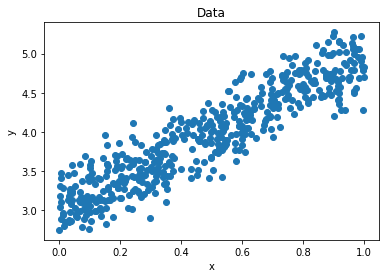

In [ ]:
#Visualise Our data
plt.scatter(x,y)
plt.title("Data")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Convert inputs and outputs to tensors (a multi-dimensional array)
inputs = torch.from_numpy(x)
targets = torch.from_numpy(y)
print(inputs[:5])
print(targets[:5])

tensor([0.7734, 0.5936, 0.3003, 0.3254, 0.5429], dtype=torch.float64)
tensor([4.9688, 4.6727, 3.6980, 3.7356, 3.8359], dtype=torch.float64)


In [ ]:
# Changing the data type to float32 as our model accepts float32 data type
inputs = inputs.type(torch.float32) 
targets = targets.type(torch.float32)

In [ ]:
# reshaping our data into n-rows and 1 columns. Model takes 2D array as an input
inputs = inputs.reshape(-1,1)
targets = targets.reshape(-1,1)

In [ ]:
print(targets[:5])

tensor([[4.9688],
        [4.6727],
        [3.6980],
        [3.7356],
        [3.8359]])


In [ ]:
#x * m + c
actual_targets = torch.from_numpy(x * m + c) # taking y and making it into a tensor
actual_targets = actual_targets.type(torch.float32) # changing the data type to float32
actual_targets = actual_targets.reshape(-1,1) #reshaping our data 
print(actual_targets[:5])

tensor([[4.5467],
        [4.1872],
        [3.6006],
        [3.6508],
        [4.0859]])


In [ ]:
# Define linear regression model
model = nn.Linear(1, 1) # (no. of input features, no. of output features) (linear transformation for data of type y=mx+c)
print(model.weight) # Weight of the model
print(model.bias) # Bias of the model

Parameter containing:
tensor([[0.8150]], requires_grad=True)
Parameter containing:
tensor([-0.0297], requires_grad=True)


In [ ]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[0.8150]], requires_grad=True), Parameter containing:
 tensor([-0.0297], requires_grad=True)]

In [ ]:
# Define loss function: function that computes the distance between the current output of the algorithm and the expected output
import torch.nn.functional as F

loss_fn = F.mse_loss # Measures the element-wise mean squared error. (calculating for the regression)
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(13.0322, grad_fn=<MseLossBackward>)


In [ ]:
# Define optimizer
# torch.optim is a package implementing various optimization algorithms
opt = torch.optim.SGD(model.parameters(), lr=1e-5) # lr --> learning rate

In [ ]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt,inputs, targets):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):

        # Train with batches of data
        for xb,yb in zip(inputs, targets):
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
            
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            preds_ = model(inputs)
            plt.scatter(inputs,targets, label="Data")
            plt.plot(inputs,preds_.detach().numpy(),"r-", label="Prediction")
            plt.title('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            plt.legend()
            #plt.savefig("lr_images_final/{}.png".format(epoch+1))
            plt.show()
            sleep(.2)


Epoch [10/310], Loss: 0.0007


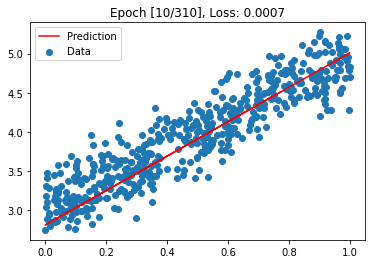

Epoch [20/310], Loss: 0.0012


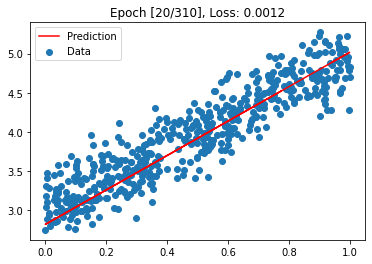

Epoch [30/310], Loss: 0.0017


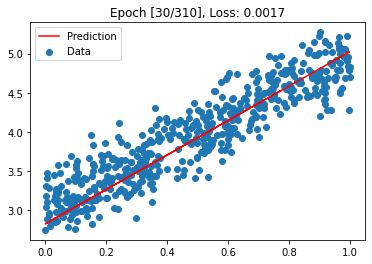

Epoch [40/310], Loss: 0.0023


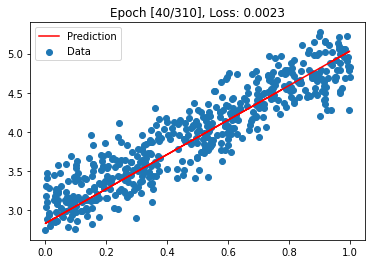

Epoch [50/310], Loss: 0.0028


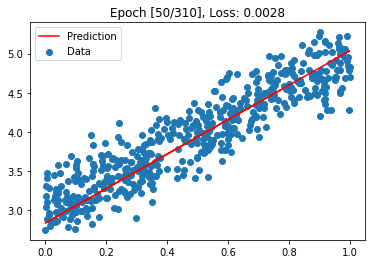

Epoch [60/310], Loss: 0.0033


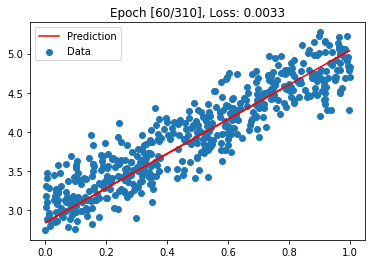

Epoch [70/310], Loss: 0.0038


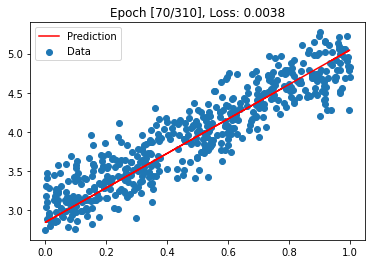

Epoch [80/310], Loss: 0.0042


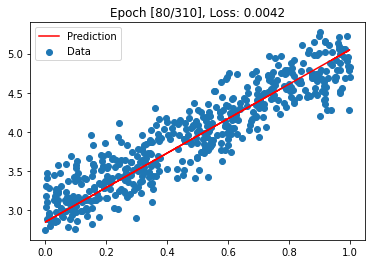

Epoch [90/310], Loss: 0.0046


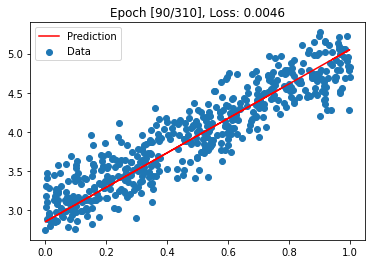

Epoch [100/310], Loss: 0.0050


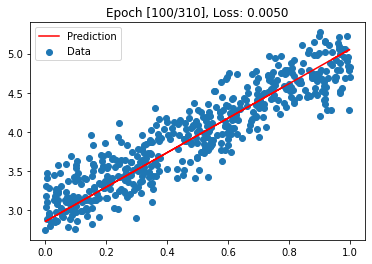

Epoch [110/310], Loss: 0.0053


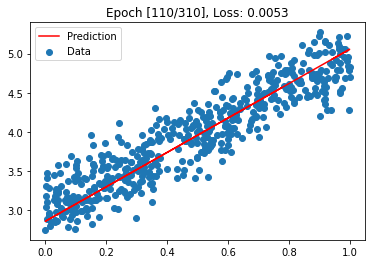

Epoch [120/310], Loss: 0.0056


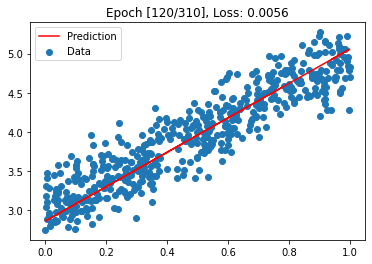

Epoch [130/310], Loss: 0.0058


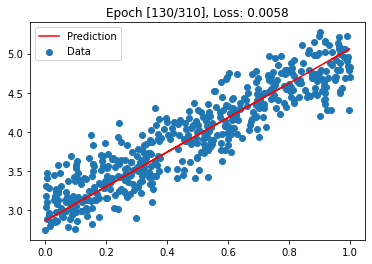

Epoch [140/310], Loss: 0.0060


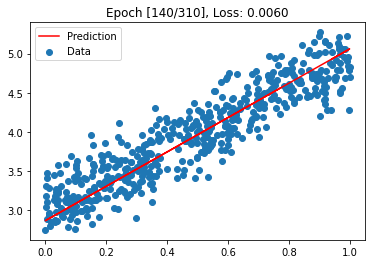

Epoch [150/310], Loss: 0.0062


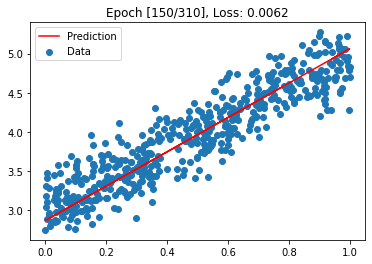

Epoch [160/310], Loss: 0.0063


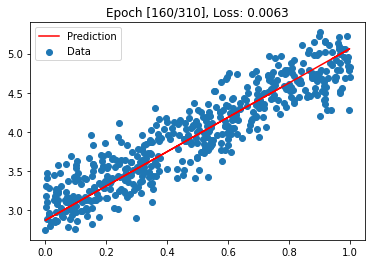

Epoch [170/310], Loss: 0.0064


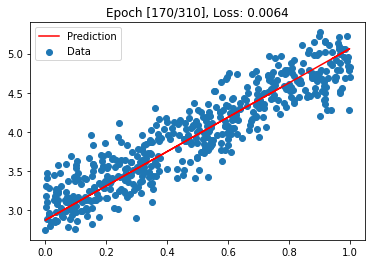

Epoch [180/310], Loss: 0.0065


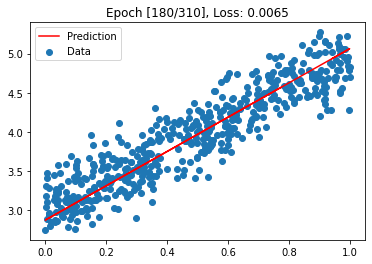

Epoch [190/310], Loss: 0.0065


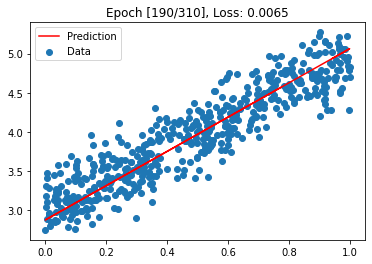

Epoch [200/310], Loss: 0.0066


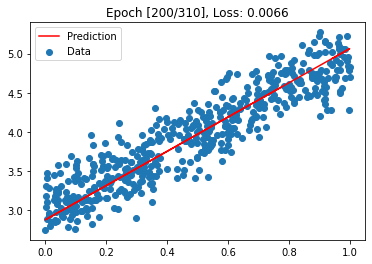

Epoch [210/310], Loss: 0.0066


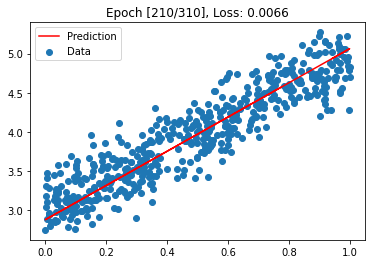

Epoch [220/310], Loss: 0.0066


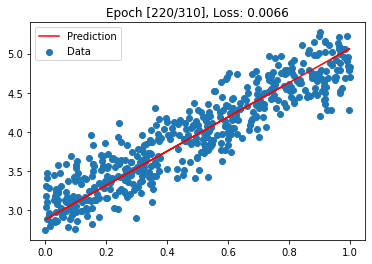

Epoch [230/310], Loss: 0.0066


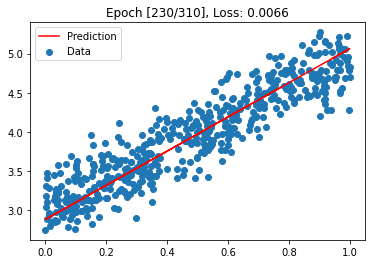

Epoch [240/310], Loss: 0.0065


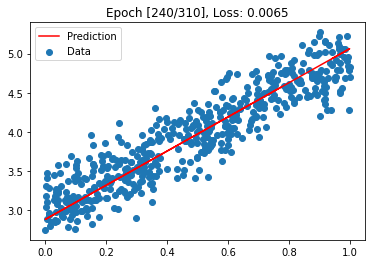

Epoch [250/310], Loss: 0.0065


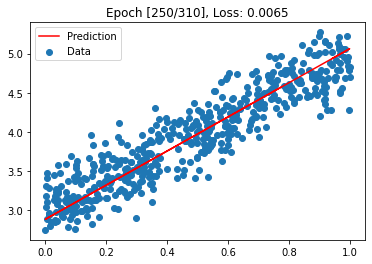

Epoch [260/310], Loss: 0.0065


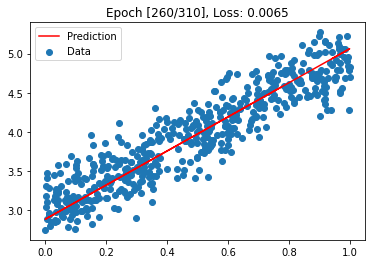

Epoch [270/310], Loss: 0.0064


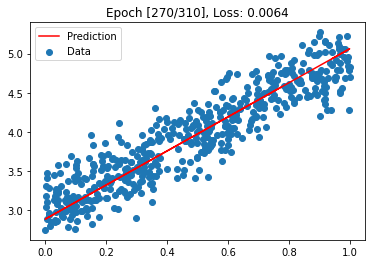

Epoch [280/310], Loss: 0.0064


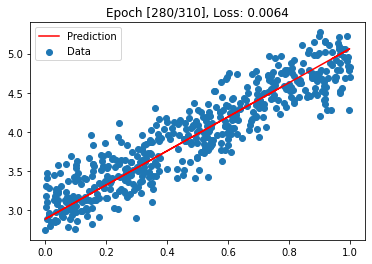

Epoch [290/310], Loss: 0.0063


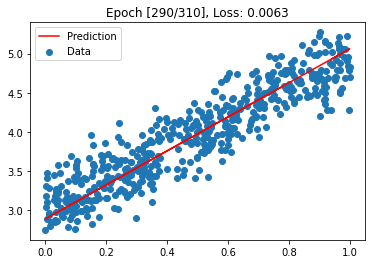

Epoch [300/310], Loss: 0.0062


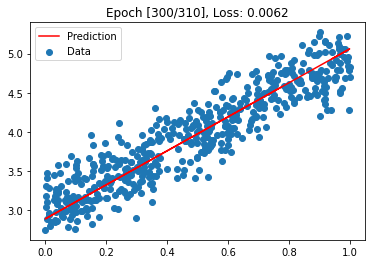

Epoch [310/310], Loss: 0.0062


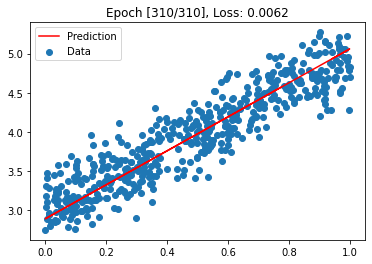

In [ ]:
fit(310, model, loss_fn, opt,inputs, targets, )

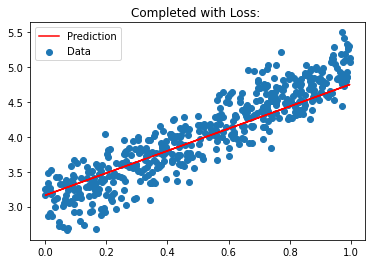

In [ ]:
preds = model(inputs)
plt.scatter(inputs,targets, label="Data")
plt.plot(inputs,preds.detach().numpy(),"r-", label="Prediction")
plt.title('Completed with Loss: ')
plt.legend()
plt.show()